# Introduction

## Download dataset and custom Python modules

In [1]:
# # Clone repo containing MNIST data and the neural network modules
# !git clone -b neural_net_dev https://github.com/papir805/Stanford-ML-Class.git

## Important Python Libraries for Data Science

In [2]:
# For organizing and manipulating data
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
import cv2

# Importing Custom Modules for Neural Networks and Working with MNIST

In [3]:
# Used to identify file paths for our datasets and custom modules
import os
import sys

# Specify path of cloned GitHub directory
gh_dir = os.getcwd()+'/Stanford-ML-Class'

# Specify Python should look at the parent directory
# to import custom modules
sys.path.insert(0, '../')

# Specify Python should look at the cloned gh directory
# to import custom modules
# sys.path.insert(0, gh_dir)

# Import custom neural network modules
from neural_network_scripts import mnist_loader, network, image_processing

# Read Data

The MNIST dataset contains images of 70,000 handwritten digits.  The images are split into two smaller datasets for training and testing.  In this notebook, the training dataset contains 50,000 digits and the testing dataset contains another 10,000 digits.  This leaves 10,000 digits that aren't used.

In [4]:
# Load datasets
data_path = "../data/mnist.pkl.gz"

# # Load datasets
# file_path = gh_dir+"/data/mnist.pkl.gz"

# Unpack dataset into training and testing data
training_data, _, test_data = \
mnist_loader.load_data_wrapper(data_path)

In [5]:
# Check the size of the training and testing datasets
n_training_samples = len(training_data)
n_testing_samples = len(test_data)

print(f"There are {n_training_samples:,} digits in the training set and {n_testing_samples:,} digits in the testing set.")

There are 50,000 digits in the training set and 10,000 digits in the testing set.


## Visualizing the Dataset

Each handwritten digit starts off as a 2-D image represented using a 28x28 pixel grid.  However, each image has undergone image processing to standardize the image, which makes it easier for the neural network to learn from, and then gets "flattened" into a 1-D Python list containing 784 elements, one for each of the pixels ($28 * 28 = 784$) in the grid.  

Each element in the list is a grayscale value between 0 - 1 representing how bright that pixel should be.  A value of 0 displays as black because 0 represents the absence of color whereas a value of 1 would be white.  

In order to visualize each digit, its original 28x28 pixel grid needs to be reconstructed first.

### The First Digit From the Training Dataset

In [6]:
first_digit = training_data[0][0]
first_digit_num_pixels = len(first_digit)

print(f"The first image contains {first_digit_num_pixels} pixels.")

The first image contains 784 pixels.


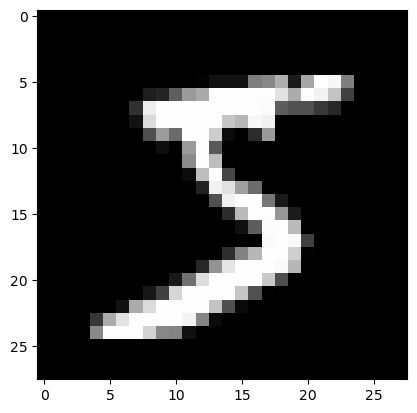

In [7]:
# Use the 784 pixels to reconstruct the original 28x28 pixel grid
# and print the digit
image_processing.print_image(first_digit)

### The Second Digit From the Training Dataset

In [8]:
second_digit = training_data[1][0]
second_digit_num_pixels = len(second_digit)

print(f"The second image also contains {second_digit_num_pixels} pixels.")

The second image also contains 784 pixels.


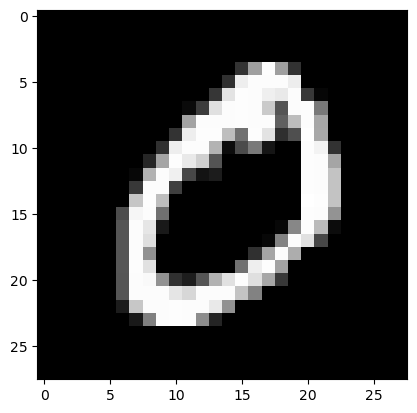

In [9]:
# Use the 784 pixels to reconstruct the original 28x28 pixel grid
# and print the digit
image_processing.print_image(second_digit)

# Initializing the Model

In [10]:
# Create a three layer neural network.  The first layer has 784 input neurons
# (one for each of the 784 pixels in the 28px by 28px grid), the
# second layer has 30 neurons, and the third layer has 10 output neurons, one
# for each digit 0-9 representing the model's estimated probability of the
# image being that digit.
net = network.Network(sizes = [784, 30, 10])

In [11]:
initial_correct = net.evaluate(test_data)
initial_accuracy = initial_correct / n_testing_samples

print(f"Before training, the model predicts {initial_correct:,} correct digits out of {n_testing_samples:,} testing digits.  An initial accuracy of {initial_accuracy * 100:.2f}%.")

Before training, the model predicts 1,157 correct digits out of 10,000 testing digits.  An initial accuracy of 11.57%.


## Training the model

Training the model requires training_data and involves a process called Stochastic Gradient Descent (SGD).  This process requires several hyperparameters: epochs, mini_batch_size, and eta.  Additionally, if test_data is provided, we can see how good the model is at generalizing what it's learned to make predictions on unseen data.

As mentioned earlier, the training_data consists of 50,000 images of handwritten digits each represented as 784 grayscale values for the pixels in a 28px by 28px grid.  Additionally, training_data also specifies which digit (0-9) each image represents. 

An epoch represents a complete training cycle over all images in the training dataset.  Within an epoch, the training data is first shuffled and then broken into smaller batches dictated by the mini_batch_size. The model is trained on each mini batch and the SGD algorithm updates the model's weights and biases each time until all mini batches have been used, thus completing an epoch.  

A higher number of epochs will increase the time it takes for SGD to complete as each epoch represents another training cycle.  The more epochs, the more opportunities to reach a solution, but setting this parameter too high will lead to diminishing returns.  Generally, the model's accuracy will converge to it's maximum value after a certain number of epochs.  Any additional epochs will take more time to complete but the model's accuracy will not change much.

Eta, also known as the learning rate, controls how much the weights and biases get changed after training over a mini batch.  Larger values of eta allow for the weights and biases to change in magnitude more than a smaller value of eta.  Typically, a larger value of eta means the model will reach a solution more quickly, although the solution may end up being a sub-optimal one.  On the other hand, a smaller value of eta will take more time to reach a solution, but it's more likely to be an optimal one. 

After completing each epoch, the model predicts the value of each of the 10,000 digits in test_data to assess its accuracy.    

In [12]:
# Train the model over 30 epochs, with mini batch sizes of 10, and a learning
# rate of 3.0
net.SGD(training_data = training_data,
        epochs = 30,
        mini_batch_size = 10,
        eta = 3.0,
        test_data=test_data)

Epoch 1: 9075 / 10000 = 90.75% accuracy
Epoch 2: 9230 / 10000 = 92.3% accuracy
Epoch 3: 9307 / 10000 = 93.07% accuracy
Epoch 4: 9364 / 10000 = 93.64% accuracy
Epoch 5: 9379 / 10000 = 93.79% accuracy
Epoch 6: 9377 / 10000 = 93.77% accuracy
Epoch 7: 9406 / 10000 = 94.06% accuracy
Epoch 8: 9450 / 10000 = 94.5% accuracy
Epoch 9: 9468 / 10000 = 94.68% accuracy
Epoch 10: 9453 / 10000 = 94.53% accuracy
Epoch 11: 9457 / 10000 = 94.57% accuracy
Epoch 12: 9456 / 10000 = 94.56% accuracy
Epoch 13: 9425 / 10000 = 94.25% accuracy
Epoch 14: 9482 / 10000 = 94.82% accuracy
Epoch 15: 9460 / 10000 = 94.6% accuracy
Epoch 16: 9494 / 10000 = 94.94% accuracy
Epoch 17: 9495 / 10000 = 94.95% accuracy
Epoch 18: 9499 / 10000 = 94.99% accuracy
Epoch 19: 9458 / 10000 = 94.58% accuracy
Epoch 20: 9495 / 10000 = 94.95% accuracy
Epoch 21: 9489 / 10000 = 94.89% accuracy
Epoch 22: 9490 / 10000 = 94.9% accuracy
Epoch 23: 9504 / 10000 = 95.04% accuracy
Epoch 24: 9457 / 10000 = 94.57% accuracy
Epoch 25: 9493 / 10000 = 94.9

## Evaluating accuracy

NameError: name 'net' is not defined

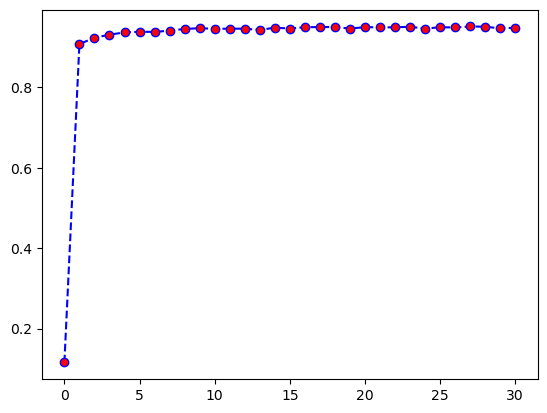

In [14]:
# epochs = np.arange(len(net.prediction_accuracy))

# fig, ax = plt.subplots(1, 1)

# ax.plot(epochs, net.prediction_accuracy,
#        linestyle='--', marker='o', color='blue',
#        markerfacecolor='red')
# ax.set_xlabel("epoch")
# ax.set_ylabel("Prediction Accuracy")

# y_ticks = ax.get_yticks()
# y_ticks = np.append(y_ticks, net.initial_accuracy)
# y_ticks.sort()
# ax.set_yticks(y_ticks)
# ax.set_ylim(0,1);

net.plot_test_accuracy()

# Generating Predictions From Your Own Handwriting

After training, the model can be used to predict the value of our own images.  It should do a good job, too, as it's accuracy has converged to about 95%, which is quite high.  However, the model was trained using images that were processed and any image fed into the model must also undergo the same image processing.

## Image1

In [ ]:
# Original Image
image1_path = gh_dir+"/images/handwritten_2.png"
image1 = cv2.imread(image1_path)
plt.imshow(image1);

In [ ]:
# Processed image
processed_image1 = \
image_processing.process_image(image1_path)
image_processing.print_image(processed_image1)

In [ ]:
# Make prediction
net.predict(processed_image1)

## Image2

In [ ]:
# Original Image
image2_path = gh_dir+"/images/handwritten_8.jpg"
image2 = cv2.imread(image2_path)
plt.imshow(image2);

In [ ]:
# Processed Image
processed_image2 = \
image_processing.process_image(image2_path)
image_processing.print_image(processed_image2)

In [ ]:
net.predict(processed_image2)

## Image3

In [ ]:
# Original Image
image3_path = gh_dir+"/images/handwritten_4.jpg"
image3 = cv2.imread(image3_path)
plt.imshow(image3);

In [ ]:
# Processed Image
processed_image3 = \
image_processing.process_image(image3_path)
image_processing.print_image(processed_image3)

In [ ]:
net.predict(processed_image3)

The end